In [2]:
%pip install -U opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 702.9 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import math

import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read image

(1024, 1024, 3)


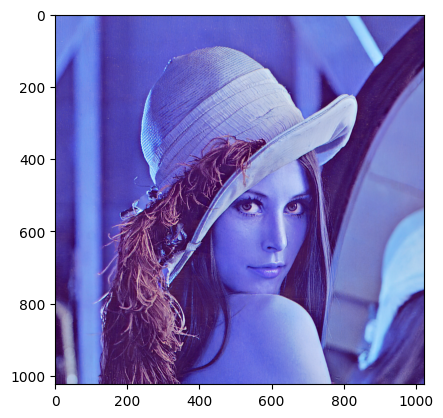

libpng warning: iCCP: known incorrect sRGB profile


(2976, 2430, 3)


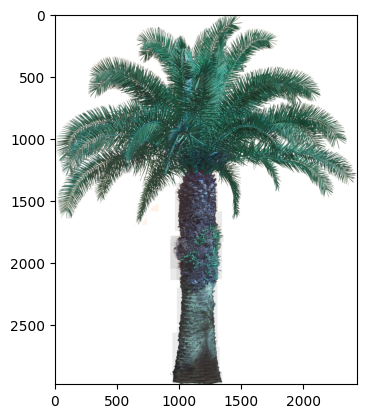

In [7]:
img = cv2.imread("lenna.png")
print(img.shape)
plt.imshow(img)
plt.show()

img = cv2.imread("palm_tree.png")
print(img.shape)
plt.imshow(img);

### Color spaces

(1024, 1024, 3)


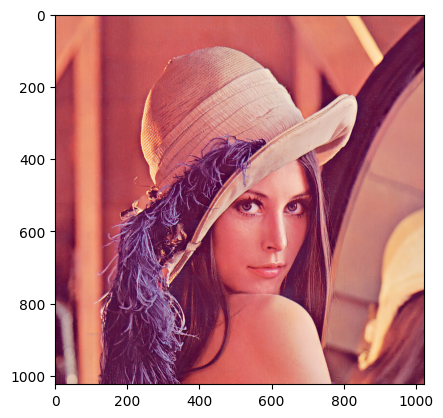

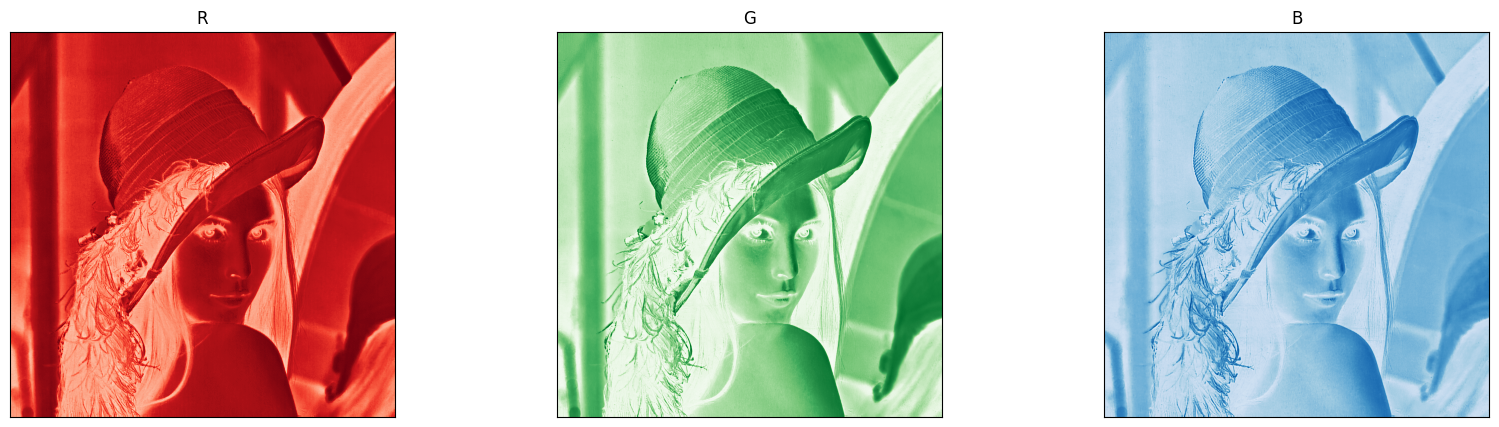

In [8]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(rgb_img.shape)
plt.imshow(rgb_img)
plt.show()

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
for i, cmap in enumerate(("Reds", "Greens", "Blues")):
    ax = axes[i]
    channel = rgb_img[:, :, i]
    ax.imshow(channel, cmap=cmap)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(cmap[0])

libpng warning: iCCP: known incorrect sRGB profile


(2976, 2430, 4)


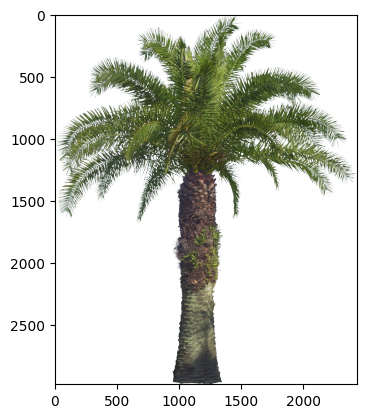

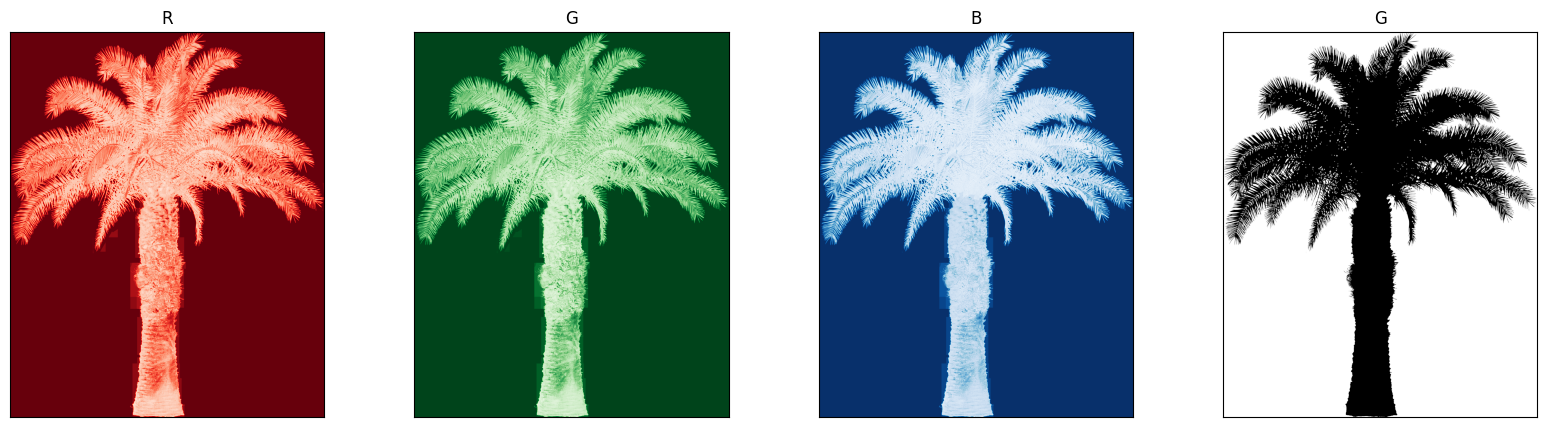

In [10]:
img = cv2.imread("palm_tree.png", cv2.IMREAD_UNCHANGED)
rgba_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
print(rgba_img.shape)
plt.imshow(rgba_img)
plt.show()

fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
for i, cmap in enumerate(("Reds", "Greens", "Blues", "Greys")):
    ax = axes[i]
    channel = rgba_img[:, :, i]
    ax.imshow(channel, cmap=cmap)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(cmap[0])

### Resize, Flip, Rotate

#### Resize

`interpolation=cv2.INTER_LINEAR`: Це параметр, який вказує `OpenCV` (cv2) на метод інтерполяції для зміни розміру зображення. У випадку `INTER_LINEAR` використовується лінійна інтерполяція, де нові значення пікселів обчислюються шляхом лінійного зваження значень пікселів, що оточують даний піксель у вихідному зображенні. Цей метод надає швидке зменшення або збільшення розміру зображення, але якість може бути менш високою порівняно з більш складними методами інтерполяції, такими як кубічна.

**Лінійна інтерполяція** - це метод апроксимації нових значень між двома відомими точками або значеннями за допомогою лінійної функції. У контексті зображень, лінійна інтерполяція використовується для обчислення нових значень пікселів на основі значень пікселів, які отримані з вихідного зображення. Для кожного нового пікселя в збільшеному або зменшеному зображенні використовуються значення пікселів з найближчих точок на вихідному зображенні для створення лінійного переходу між ними. Цей метод є простим і швидким, але може призводити до втрати деталей і якості зображення, особливо при значних змінах розміру.

`interpolation=cv2.INTER_AREA`: Це параметр, який вказує `OpenCV` (cv2) на метод інтерполяції для зміни розміру зображення. У даному випадку `INTER_AREA` використовується для зменшення розміру зображення, використовуючи площинну інтерполяцію.

**Площинна інтерполяція**: Це метод інтерполяції, який використовується для апроксимації нових значень на основі значень, отриманих з вихідного зображення, що знаходяться на одній площині. У контексті зміни розміру зображення, площинна інтерполяція розраховує нові значення пікселів на основі їх оточення на вихідному зображенні в малюнку нижчого або вищого розміру.

`interpolation=cv2.INTER_CUBIC`: Це також параметр інтерполяції в `OpenCV` (cv2), але в цьому випадку `INTER_CUBIC` використовується для зміни розміру зображення, використовуючи кубічну інтерполяцію, що зазвичай дає більш якісний результат для збільшення розміру зображення.

**Кубічна інтерполяція**: Це метод інтерполяції, який використовує кубічні функції для апроксимації нових значень пікселів на збільшеному зображенні. Він використовує інформацію з більшого оточення пікселів, ніж лінійна інтерполяція, щоб зменшити артефакти та забезпечити гладку зміну яскравості та кольорів у збільшеному зображенні.

(1024, 1024, 3)


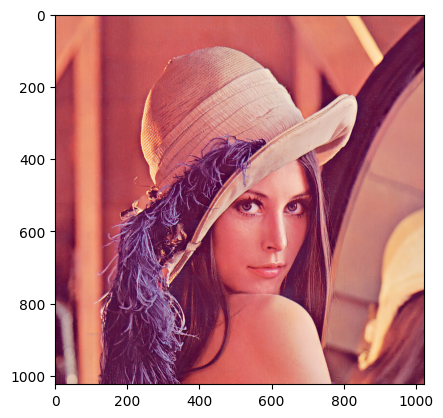

Height: 1024
Width: 1024
(102, 102, 3)


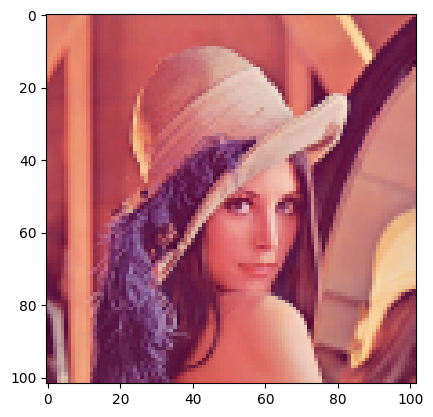

(102, 102, 3)


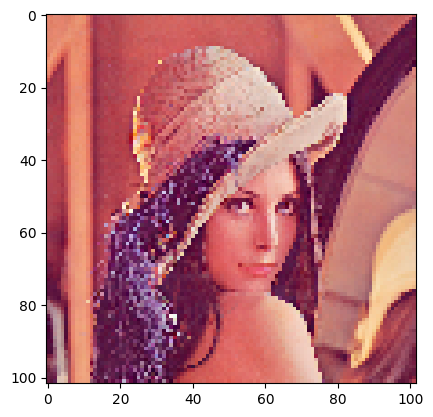

In [11]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(rgb_img.shape)
plt.imshow(rgb_img)
plt.show()

print("Height:", img.shape[0])
print("Width:", img.shape[1])

# keeping aspect ratio
scale = 0.1
h, w = int(img.shape[0] * scale), int(img.shape[1] * scale) 

resized = cv2.resize(rgb_img, (w, h), interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

resized = cv2.resize(rgb_img, (w, h), interpolation=cv2.INTER_CUBIC)
print(resized.shape)
plt.imshow(resized)
plt.show()

(1024, 1024, 3)


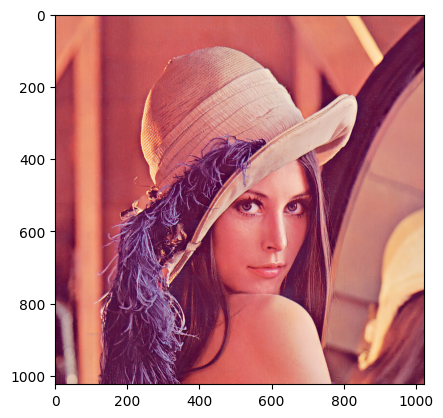

(32, 32, 3)


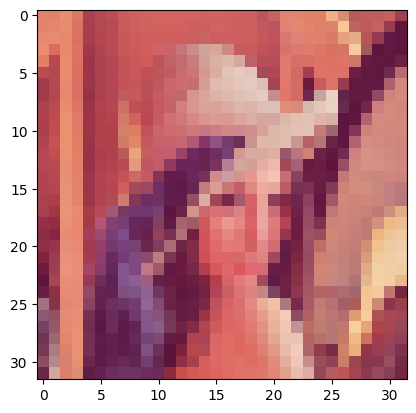

(32, 32, 3)


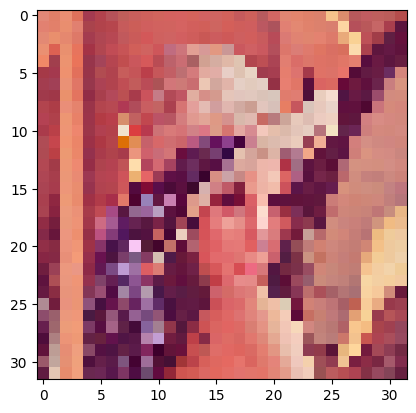

In [13]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(rgb_img.shape)
plt.imshow(rgb_img)
plt.show()
 
# don't preserve aspect ratio
h, w = 32, 32

resized = cv2.resize(rgb_img, (w, h), interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()

resized = cv2.resize(rgb_img, (w, h), interpolation=cv2.INTER_CUBIC)
print(resized.shape)
plt.imshow(resized)
plt.show()

**[Interpolation methods visualizations](https://chadrick-kwag.net/cv2-resize-interpolation-methods/)**

#### Flip

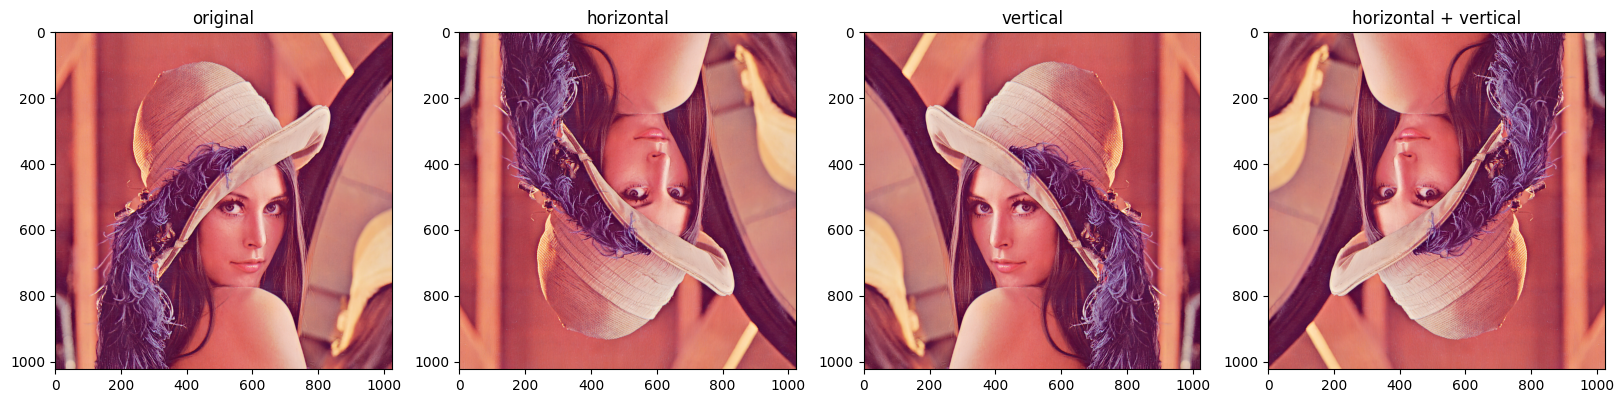

In [14]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
axes[0].imshow(rgb_img)
axes[0].set_title("original")

flipped = cv2.flip(rgb_img, 0)
axes[1].imshow(flipped)
axes[1].set_title("horizontal")

flipped = cv2.flip(rgb_img, 1)
axes[2].imshow(flipped)
axes[2].set_title("vertical")

flipped = cv2.flip(rgb_img, -1)
axes[3].imshow(flipped)
axes[3].set_title("horizontal + vertical");

#### Rotation

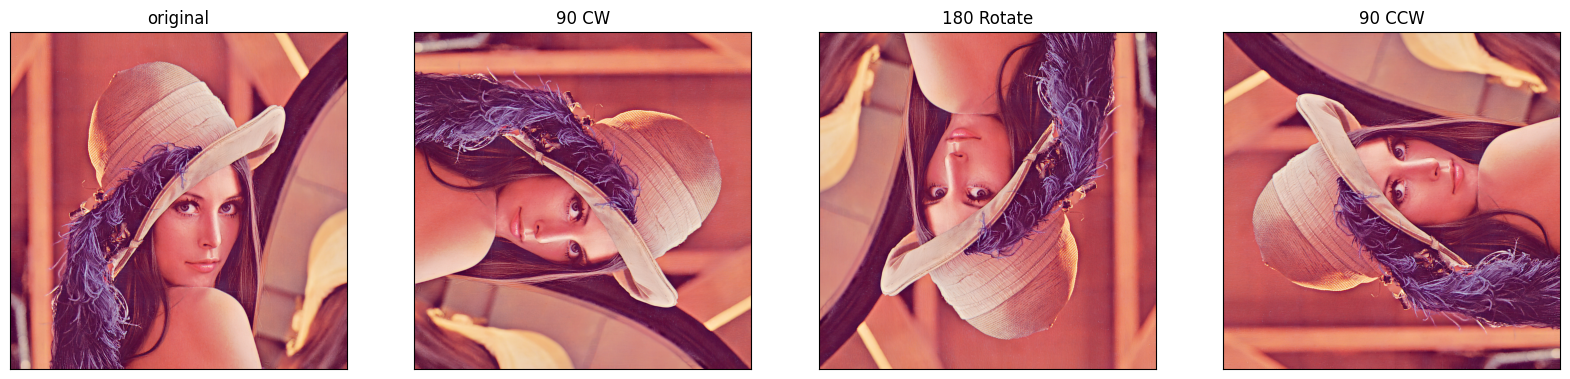

In [15]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

titles = ("original", "90 CW", "180 Rotate", "90 CCW")
imgs = [
    rgb_img,
    cv2.rotate(rgb_img, cv2.ROTATE_90_CLOCKWISE),
    cv2.rotate(rgb_img, cv2.ROTATE_180),
    cv2.rotate(rgb_img, cv2.ROTATE_90_COUNTERCLOCKWISE),
]
fig, axes = plt.subplots(ncols=len(imgs), figsize=(20, 5))
for ax, image, title in zip(axes, imgs, titles):
    ax.imshow(image)
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

In [19]:
rgb_img.shape[:2]

(1024, 1024)

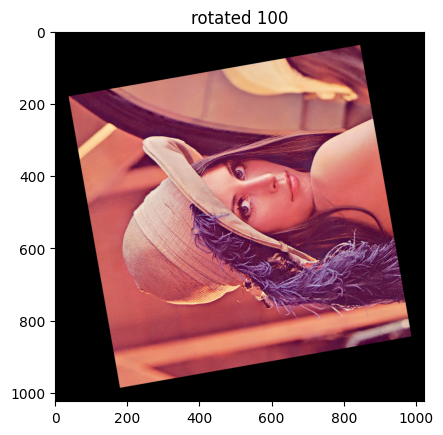

In [26]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w = rgb_img.shape[:2]
angle = 100

rotation_matrix = cv2.getRotationMatrix2D(center=(w / 2, h / 2), angle=angle, scale=0.8)
rotated = cv2.warpAffine(rgb_img, rotation_matrix, (w, h))

plt.imshow(rotated)
plt.title(f"rotated {angle}");

### Filters

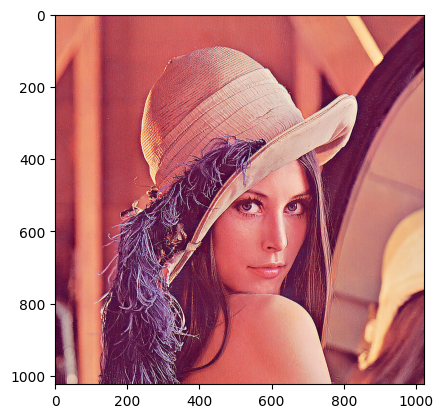

In [32]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# sharpening
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
])

processed = cv2.filter2D(rgb_img, -1, kernel)
plt.imshow(processed);

In [25]:
np.ones([9, 9], dtype="float32")

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

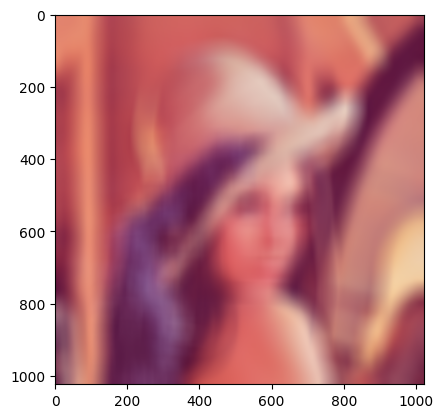

In [38]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# bluring
kernel_ones = np.ones([64, 64], dtype="float32")
kernel = kernel_ones / np.prod(kernel_ones.shape)

processed = cv2.filter2D(rgb_img, -1, kernel)
plt.imshow(processed);

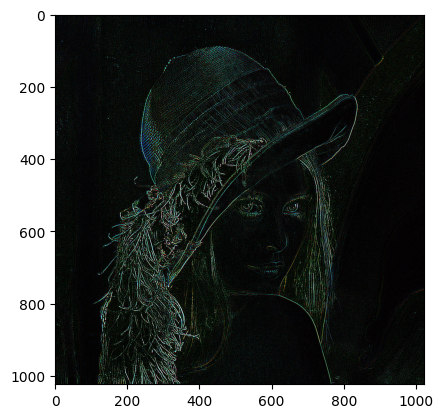

In [39]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# edge detection
kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

processed = cv2.filter2D(rgb_img, -1, kernel)
plt.imshow(processed);

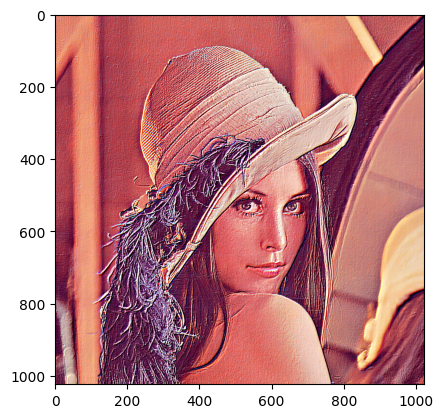

In [40]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# emboss filter
kernel = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2],
])

processed = cv2.filter2D(rgb_img, -1, kernel)
plt.imshow(processed);

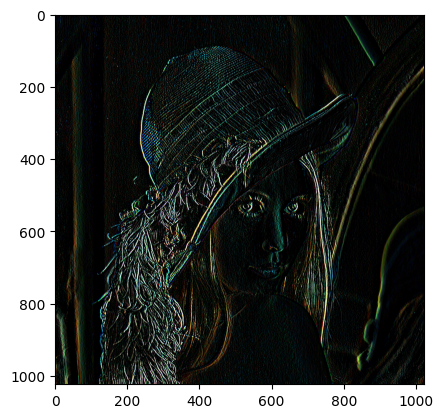

In [41]:
img = cv2.imread("lenna.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# sobel filter
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

processed = cv2.filter2D(rgb_img, -1, kernel)
plt.imshow(processed);

### [Canny Edge Detector](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

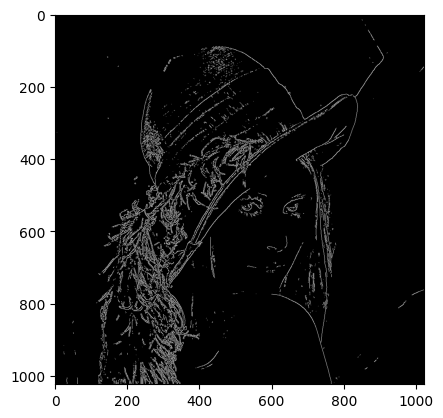

In [46]:
img = cv2.imread("lenna.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.Canny(gray_img, 230, 240, None, 3)

plt.imshow(dst, cmap="gray");

#### [Binary Morphological Transformations](https://docs.opencv.org/4.5.2/d9/d61/tutorial_py_morphological_ops.html)

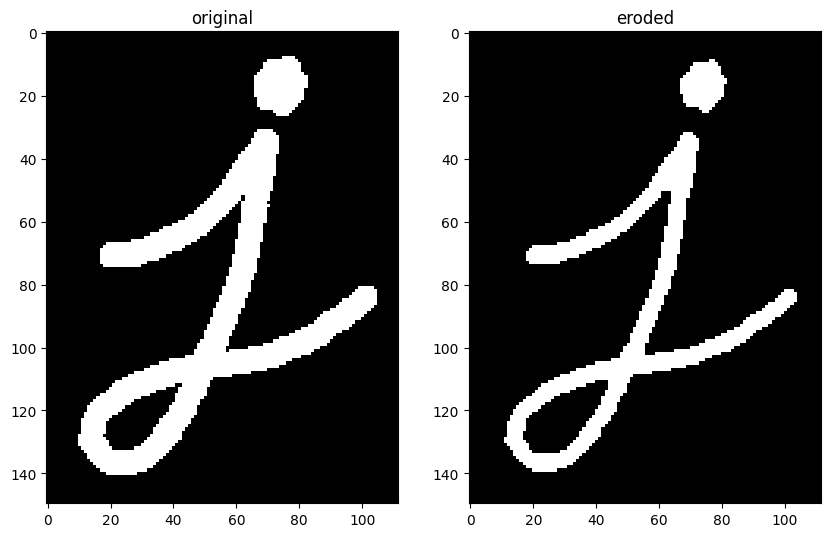

In [50]:
img = cv2.imread("j.png", 0)
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("original")

axes[1].imshow(erosion, cmap="gray")
axes[1].set_title("eroded");

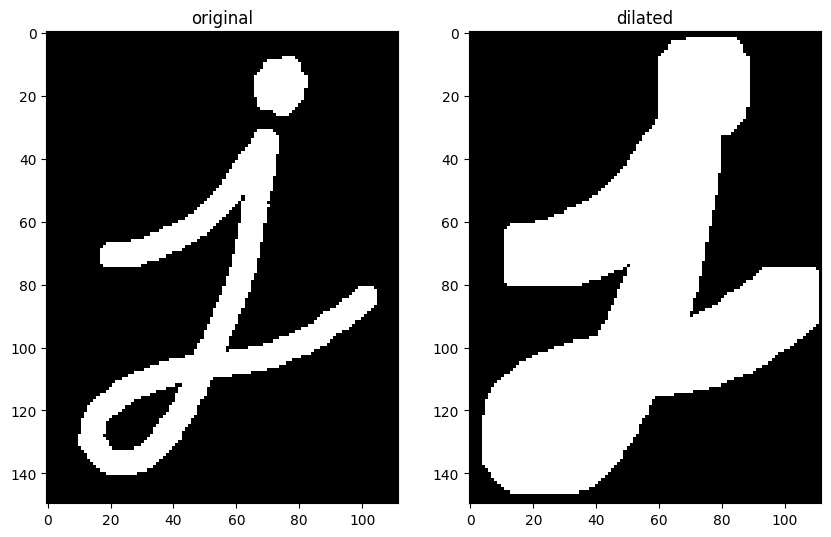

In [53]:
img = cv2.imread("j.png", 0)
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=6)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("original")

axes[1].imshow(dilation, cmap="gray")
axes[1].set_title("dilated");

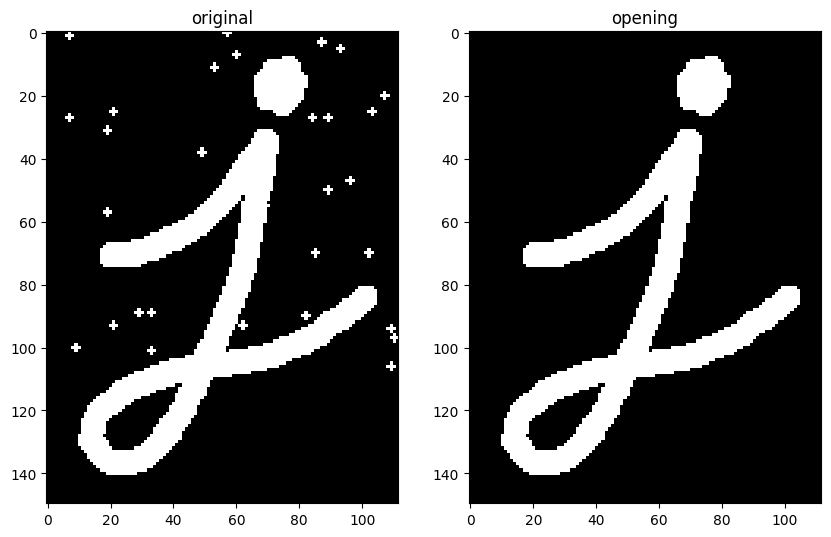

In [54]:
np.random.seed(2021)
img = cv2.imread("j.png", 0)

for i in range(50):
    img = cv2.circle(
        img, 
        center=(
            np.random.randint(0, img.shape[0]),
            np.random.randint(0, img.shape[1])
        ),
        radius=np.random.randint(1, 2),
        thickness=-1,
        color=255
    )

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("original")

axes[1].imshow(opening, cmap="gray")
axes[1].set_title("opening");

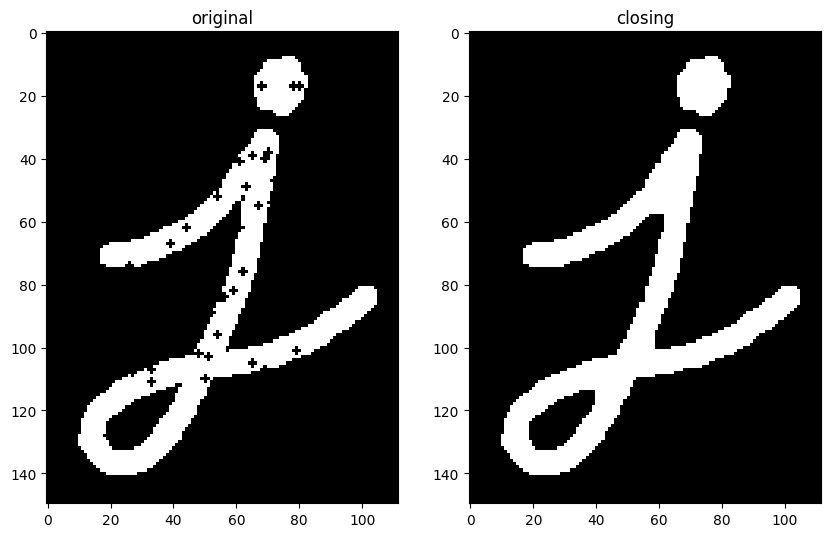

In [55]:
img = cv2.imread("j.png", 0)

np.random.seed(2021)
for i in range(200):
    img = cv2.circle(
        img, 
        center=(
            np.random.randint(0, img.shape[0]),
            np.random.randint(0, img.shape[1])
        ),
        radius=np.random.randint(1, 2),
        thickness=-1,
        color=0
    )

kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("original")

axes[1].imshow(closing, cmap="gray")
axes[1].set_title("closing");

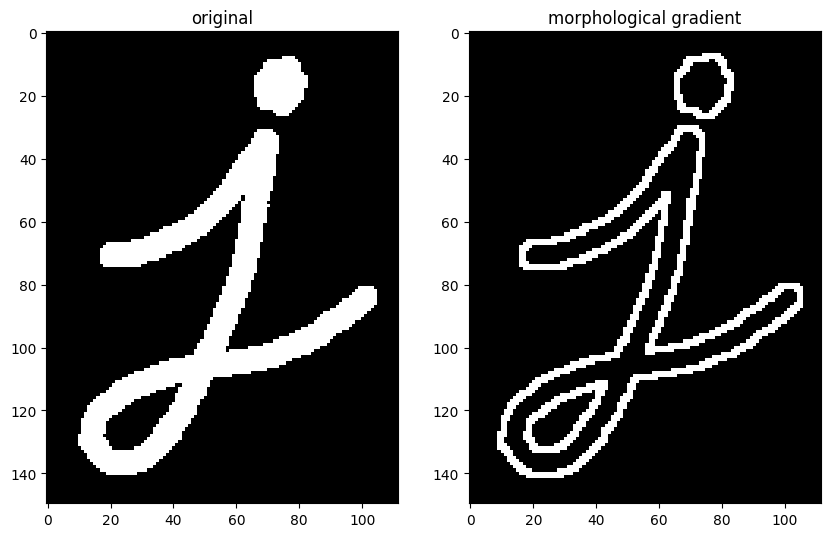

In [56]:
img = cv2.imread("j.png", 0)
kernel = np.ones((3, 3), np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("original")

axes[1].imshow(gradient, cmap="gray")
axes[1].set_title("morphological gradient");